### Price returns

Return from time $t$ to time ${t+1} is given by:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

In [1]:
/ create some random values as price in the range of 80 - 100

p1: 80+(12?20.0)
p1

87.85505 90.34182 90.31959 88.13328 83.56168 86.03545 95.70066 90.69419 94.22..


In [2]:
/ calculate the return

/ Use prev methods
\t:10000 (p1 % prev p1) - 1 

/ Use prior
\t:10000 prior[{(x%y)-1};p1]

28


168


In [3]:
/ Use deltas method

\t:10000 (deltas p1) % prev p1


29


**Prev method is better than others**

### Let's create a sample table

In [4]:
/ Create table 
t: ([] AAPL: 80+12?15.0;META:80+12?15.0)


/update the CHANGES columns
update AAPL_CHANGES:(AAPL % prev AAPL)-1, META_CHANGES:(META % prev META)-1 from `t;

5#t

AAPL     META     AAPL_CHANGES META_CHANGES
-------------------------------------------
94.24963 81.25833                          
86.58621 82.93986 -0.08130972  0.02069366  
88.63858 85.63457 0.02370311   0.03248991  
88.87851 89.20618 0.002706828  0.04170755  
92.72235 87.94221 0.04324829   -0.01416904 


Note we cannot compute returns for the first day, because we dont have the closing price for the previous day. In general, we lose one data point when we go from prices to returns.

In [5]:
/update the month columns
update month:2023.01m+til 12 from `t;

/remove the first row
t : 1_t;

t

AAPL     META     AAPL_CHANGES META_CHANGES month  
---------------------------------------------------
86.58621 82.93986 -0.08130972  0.02069366   2023.02
88.63858 85.63457 0.02370311   0.03248991   2023.03
88.87851 89.20618 0.002706828  0.04170755   2023.04
92.72235 87.94221 0.04324829   -0.01416904  2023.05
85.83584 90.37415 -0.07427022  0.0276538    2023.06
85.87314 83.44492 0.0004346012 -0.07667264  2023.07
81.21853 90.3793  -0.05420336  0.0831012    2023.08
94.05126 87.06182 0.1580024    -0.03670611  2023.09
84.17318 89.52007 -0.1050286   0.02823569   2023.10
83.58851 94.5086  -0.006946044 0.05572519   2023.11
82.2622  83.45958 -0.01586716  -0.1169102   2023.12


In [6]:
/ Get the changes column only and save it in tv view

tv:: select month, AAPL_CHANGES, META_CHANGES from t

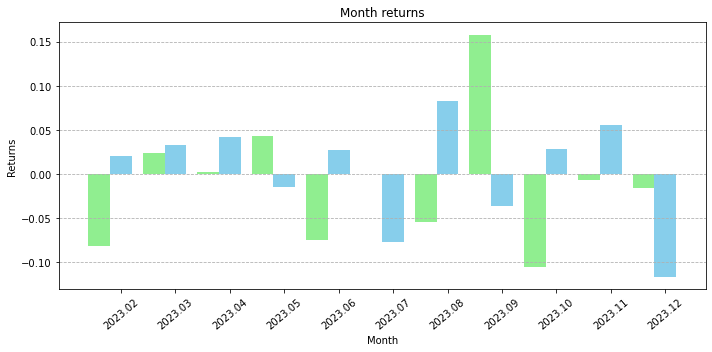

In [7]:
/Use embedpy to create visuals, getting help from beloved python.

p)import matplotlib.pyplot as plt
p)import numpy as np

/pass the month and returns list to python environment
.p.set[`months;string tv`month]
.p.set[`aapl_returns;tv`AAPL_CHANGES]
.p.set[`meta_returns;tv`META_CHANGES]

p)index = np.arange(len(months)) 

p)plt.figure(figsize=(10,5))
p)plt.bar(index,aapl_returns, width = 0.40, color='lightgreen')
p)plt.bar(index+0.40, meta_returns, width = 0.40, color = 'skyblue')

/Titles
p)plt.title("Month returns")
p)plt.xlabel("Month")
p)plt.ylabel("Returns")
p)plt.xticks(index+0.40, months, rotation=40)

p)plt.grid(axis='y', linestyle='--');

p)plt.tight_layout();
p)plt.show();

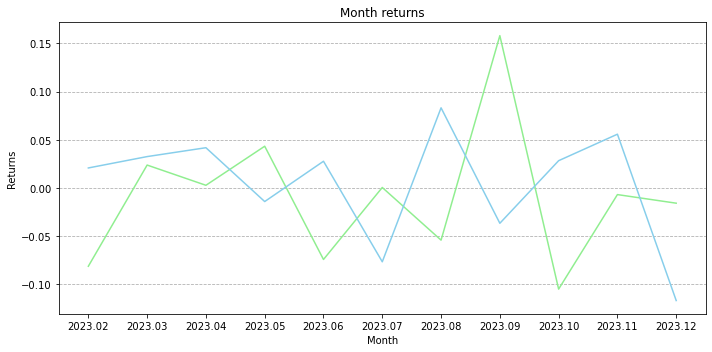

In [8]:
p)plt.figure(figsize=(10,5))
p)plt.plot(months,aapl_returns, color='lightgreen');
p)plt.plot(months, meta_returns, color = 'skyblue');

/Titles
p)plt.title("Month returns")
p)plt.xlabel("Month")
p)plt.ylabel("Returns")

p)plt.grid(axis='y', linestyle='--');

p)plt.tight_layout();
p)plt.show();

## Compounding Returns

Now that we have a series of 12 monthly returns, we can produce the compounded return by multiplying the individual period returns, as long as the returns are expressed as growth rates in what I call "1+R" format.

To compound the returns, all we need to do is add 1 to each return and then multiply them. The result is itself in "1+R" format, so we need to subtract 1.


In [9]:
(prd 1+t`AAPL_CHANGES)-1

-0.127188


In [10]:
/ For whole data

(prd(1+select AAPL_CHANGES, META_CHANGES from tv))-1

AAPL_CHANGES| -0.127188
META_CHANGES| 0.02708951


## Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$


In [14]:
((prd 1+t`AAPL_CHANGES))-1

-0.127188


In [15]:
/ Annualizing return

((prd(1+select AAPL_CHANGES, META_CHANGES from tv)))-1

AAPL_CHANGES| -0.127188
META_CHANGES| 0.02708951
